In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use("classic")
%matplotlib inline

# Homework 3

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

**Due:** Jan. 26 at **2pm**.

## Exercise: Income and Growth Across Countries

The data file `cross_country_gdp_pc.csv` contains annual data on GDP per capita for over 100 countries and is available here: https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_gdp_pc.csv. The data are was constructed from the Penn World Table (https://www.rug.nl/ggdc/productivity/pwt/).

In this exercise, you will:

1. Analyze some basic facts about GDP per capita across the world.
2. Compute the average annual growth rate of GDP per capita for each country in the data.
3. Compute a linear regression of average GDP per capita growth on GDP per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [2]:
# Create a variable called 'data' that stores the data in the file 'cross_country_gdp_pc.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column

data = pd.read_csv("https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_gdp_pc.csv").set_index("Year")

# Print the first 5 rows of data
data.head(5)

,Argentina - ARG,Australia - AUS,Austria - AUT,Burundi - BDI,Belgium - BEL,Benin - BEN,Burkina Faso - BFA,Bangladesh - BGD,Bolivia (Plurinational State of) - BOL,Brazil - BRA,...,Turkey - TUR,Taiwan - TWN,U.R. of Tanzania: Mainland - TZA,Uganda - UGA,Uruguay - URY,United States - USA,Venezuela (Bolivarian Republic of) - VEN,South Africa - ZAF,Zambia - ZMB,Zimbabwe - ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,2851.49,14223.37,8984.20,676.57,9100.09,1616.84,724.34,1429.30,1771.04,2114.20,...,4691.59,2376.92,1173.90,789.13,6731.78,17462.63,6749.85,5913.81,1665.98,1990.92
1961,2897.14,14303.40,9427.85,570.27,9550.57,1601.02,681.06,1391.08,1785.90,2338.23,...,4649.28,2442.46,1187.66,782.75,6739.92,17616.14,6721.12,6008.94,1670.34,2040.24
1962,2903.85,14820.87,9630.59,607.52,10008.56,1522.49,724.86,1445.78,1816.33,2442.88,...,4820.57,2550.53,1267.04,778.84,6725.06,18395.60,6972.68,6119.67,1581.47,1960.41
1963,2758.01,15573.81,9960.43,623.15,10322.03,1572.27,698.74,1505.08,1889.88,2533.68,...,5163.09,2725.46,1330.11,774.15,6514.72,18943.34,7222.31,6466.65,1614.93,1944.13
1964,2853.73,16042.42,10375.80,611.82,10947.25,1622.50,718.58,1466.38,1961.70,2572.07,...,5211.92,2947.73,1492.33,816.41,6683.54,19808.61,7757.37,6738.99,1792.59,1836.15


In [3]:
# Each column contains data for a specific country. Print the number of countries (e.g., the length of data.columns)
len(data.columns)

111

In [4]:
# Each column contains data for a specific year. Print the number of years (e.g., the length of data.index)
len(data.index)

58

In [5]:
# Print the values of the initial year and the final year in the data
data.iloc[0], data.iloc[-1]

(Argentina - ARG                              2851.49
 Australia - AUS                             14223.37
 Austria - AUT                                8984.20
 Burundi - BDI                                 676.57
 Belgium - BEL                                9100.09
                                               ...   
 United States - USA                         17462.63
 Venezuela (Bolivarian Republic of) - VEN     6749.85
 South Africa - ZAF                           5913.81
 Zambia - ZMB                                 1665.98
 Zimbabwe - ZWE                               1990.92
 Name: 1960, Length: 111, dtype: float64,
 Argentina - ARG                             16466.73
 Australia - AUS                             47392.62
 Austria - AUT                               46103.27
 Burundi - BDI                                 799.61
 Belgium - BEL                               38340.89
                                               ...   
 United States - USA                    

In [6]:
# Create a variable called 'data_initial' that is equal to the first row of the data DataFrame
data_initial = data.iloc[0]

# Create a variable called 'data_final' that is equal to the last row of the data DataFrame
data_final = data.iloc[-1]

data_initial.compare(data_final)

,self,other
Argentina - ARG,2851.49,16466.73
Australia - AUS,14223.37,47392.62
Austria - AUT,8984.20,46103.27
Burundi - BDI,676.57,799.61
Belgium - BEL,9100.09,38340.89
...,...,...
United States - USA,17462.63,54794.76
Venezuela (Bolivarian Republic of) - VEN,6749.85,7696.67
South Africa - ZAF,5913.81,11741.27
Zambia - ZMB,1665.98,3699.01


In [7]:
# Use the sort_values() method of data_initial to sort the Series in ascending order.
data_initial.sort_values(inplace = True) 

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the initial year of the data
data_initial.head(10)


Botswana - BWA         404.68
Mozambique - MOZ       493.70
Ethiopia - ETH         522.52
Burundi - BDI          676.57
Egypt - EGY            685.77
Nepal - NPL            701.33
Mali - MLI             703.97
Malta - MLT            718.99
Burkina Faso - BFA     724.34
Guinea-Bissau - GNB    763.46
Name: 1960, dtype: float64

In [8]:
# Use the sort_values() method of data_final to sort the Series in ascending order.
data_final.sort_values(inplace = True)

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the final year of the data
data_final.head(10)


Central African Republic - CAF     727.29
D.R. of the Congo - COD            760.47
Burundi - BDI                      799.61
Niger - NER                        908.65
Malawi - MWI                      1038.32
Chad - TCD                        1307.97
Mozambique - MOZ                  1376.55
Togo - TGO                        1566.15
Ethiopia - ETH                    1591.49
Madagascar - MDG                  1591.55
Name: 2017, dtype: float64

In [9]:
# Print the names of the countries that are among the 10 with lowest GDPs per capita in BOTH the initial year and 
# the final year.

data_initial.head(10).index.intersection(data_final.head(10).index)

Index(['Mozambique - MOZ', 'Ethiopia - ETH', 'Burundi - BDI'], dtype='object')

In [10]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the initial year of the data

data_initial.tail(10)

Netherlands - NLD       11461.35
Sweden - SWE            11766.14
United Kingdom - GBR    11909.77
Denmark - DNK           12026.71
New Zealand - NZL       12835.86
Canada - CAN            13360.91
Australia - AUS         14223.37
Luxembourg - LUX        15757.45
United States - USA     17462.63
Switzerland - CHE       20086.09
Name: 1960, dtype: float64

In [11]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the final year of the data

data_final.tail(10)

Austria - AUT          46103.27
Netherlands - NLD      46601.56
Australia - AUS        47392.62
Germany - DEU          47556.00
United States - USA    54794.76
Norway - NOR           60590.25
Switzerland - CHE      64219.30
Singapore - SGP        67138.11
Luxembourg - LUX       74605.23
Ireland - IRL          75916.08
Name: 2017, dtype: float64

In [12]:
# Print the names of the countries that are among the 10 with highest GDPs per capita in BOTH the initial year
# and the final year

data_initial.tail(10).index.intersection(data_final.tail(10).index)

Index(['Netherlands - NLD', 'Australia - AUS', 'Luxembourg - LUX',
       'United States - USA', 'Switzerland - CHE'],
      dtype='object')

### Part (b)

Let $y_t$ denotes GDP per capita for some country in some year $t$ and let $g$ denotes the average annual growth in GDP per capita between years 0 and $T$. $g$ is defined by:
\begin{align}
y_T & = (1+g)^T y_0
\end{align}
which implies:
\begin{align}
g & = \left(\frac{y_T}{y_0}\right)^{1/T} - 1
\end{align}
We can use this equation to compute the aveage growth rate of GDP per capita for each country in our data. Note that for our data, $T$ is equal to `len(data.index)-1`.

In [13]:
# Create a variable called 'growth_rates' that contains the average growth rate of each country in the data.
# NOTE: You do not need to re-sort the variables data_initial and data_final. If their indices don't align,
# Pandas will automatically sort their indices alphabetically.

growth_rates = ((data_final/data_initial) ** (1/len(data.index))) - 1

# Use the sort_values() method of growth_rates to sort the Series in ascending order.
growth_rates.sort_values(inplace = True)

In [14]:
# Print the average growth rate of GDP per capita for all countries rounded to 4 decimal places
growth_rates.round(4)

D.R. of the Congo - COD          -0.0217
Central African Republic - CAF   -0.0112
Niger - NER                      -0.0070
Guinea - GIN                     -0.0046
Zimbabwe - ZWE                   -0.0011
                                   ...  
Taiwan - TWN                      0.0513
Singapore - SGP                   0.0573
Republic of Korea - KOR           0.0619
Botswana - BWA                    0.0643
Malta - MLT                       0.0669
Length: 111, dtype: float64

In [15]:
# Print the standard deviation of the growth rate of GDP per capita for all countries rounded to 4 decimal places
growth_rates.std()

0.015609883741173702

In [16]:
# Print the name and growth rates of the countries with the 10 lowest growth rates of GDP per capita

growth_rates.head(10)

D.R. of the Congo - COD          -0.021663
Central African Republic - CAF   -0.011209
Niger - NER                      -0.007029
Guinea - GIN                     -0.004625
Zimbabwe - ZWE                   -0.001063
Chad - TCD                       -0.000084
Gambia - GMB                      0.000900
Nigeria - NGA                     0.001038
Madagascar - MDG                  0.001750
Barbados - BRB                    0.001890
dtype: float64

In [17]:
# Print the name and growth rates of the countries with the 10 highest growth rates of GDP per capita

growth_rates.tail(10)

China - CHN                0.045022
Thailand - THA             0.047374
Equatorial Guinea - GNQ    0.048001
Egypt - EGY                0.049340
Romania - ROU              0.050942
Taiwan - TWN               0.051276
Singapore - SGP            0.057344
Republic of Korea - KOR    0.061902
Botswana - BWA             0.064265
Malta - MLT                0.066946
dtype: float64

In [18]:
# Print the names of the countries that were BOTH among the 10 with lowest GDPs per capita in the initial year and 
# among the 10 with the highest growth of GDP per capita.


data_initial.tail(10).index.intersection(data_final.tail(10).index)


Index(['Netherlands - NLD', 'Australia - AUS', 'Luxembourg - LUX',
       'United States - USA', 'Switzerland - CHE'],
      dtype='object')

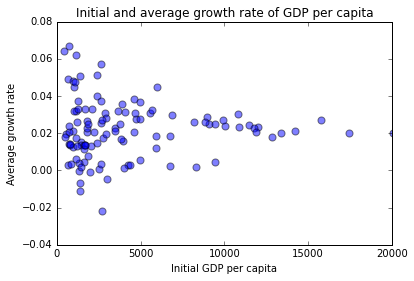

In [19]:
# Use the sort_index() method of data_initial to alphabetize the index [e.g., data_initial = data_initial.sort_index()]

data_initial.sort_index(inplace = True)

# Use the sort_index() method of growth_rates to alphabetize the index

growth_rates.sort_index(inplace = True)

# Construct a scatter plot with:
#     1. GDP per capita in the initial year on the horizontal axis
#     2. Average growth rate of GDP per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. x-axis limit: [0,20000]
#     6. Suitable title and labels for the axes

plt.scatter(x = data_initial, y = growth_rates, s = 50, alpha = .5)
plt.xlim(0, 20000)
plt.xlabel("Initial GDP per capita")
plt.ylabel("Average growth rate")
plt.title("Initial and average growth rate of GDP per capita")
plt.show()

**Question**

1. Describe in words the relationship between GDP per capita in the initial year and average growth of GDP per capita. How is the relationship different for low income countries and high income countries?

**Answer**

1.  The growth rate variation converges to around 2% as GDP per capita increases.

### Part (c)

In this part you will use OLS to estimate the relationship between GDP per capita in the initial year and average growth of GDP per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is country $i$'s initial GDP per capita, and $\epsilon_i$ is the residual of the regression.

In [26]:
# Create a variable called 'y' that is equal to the average growth rates of the countries
y = growth_rates

# Create a variable called x' that is equal to the GDP per capita of the countries in the initial year

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x = sm.add_constant(data_initial)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model = sm.OLS(y, x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results = model.fit()

# Print the summary of results generated by the summary() method of results
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.009    
Dependent Variable: y                AIC:                -605.5017 
Date:               2021-01-24 19:41 BIC:                -600.0827 
No. Observations:   111              Log-Likelihood:     304.75    
Df Model:           1                F-statistic:        0.01436   
Df Residuals:       109              Prob (F-statistic): 0.905     
R-squared:          0.000            Scale:              0.00024587
----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const     0.0222      0.0021    10.3415    0.0000     0.0179    0.0264
1960     -0.0000      0.0000    -0.1198    0.9048    -0.0000    0.0000
-------------------------------------------------------------------
Omnibus:                4.367        Durbin-Watson:           1.666
Prob(Omnibus):          0.113        Jarque-Bera (JB):        3.980
Skew:                   0.317        Prob(JB):                0.137
Kurtosis:               3.677        Condition No.:           8515 
===================================================================
* The condition number is large (9e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the estimate for the constant. Where did we see this number earlier?
3. Interpret the R-squared of the regression.

**Answers**

1.  A one percent increase in initial GDP has no effect on average state growth rates. 

2.  No idea

3. The R-squared value, 0, means that the initial GDP per capita expalins over 0% of the variation in average growth rates. 

## Exercise: Income and Growth Across US States

The data file `state_income_data.csv` contains annual data on income per capita for the 48 continental states, Washington D.C., and the United States as a whole and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv. 

In this exercise, you will:

1. Analyze some basic facts about income per capita among US states.
2. Compute the average annual growth rate of income per capita for each state in the data.
3. Compute a linear regression of average income per capita growth on income per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [21]:
# Create a variable called 'state_df' that stores the data in the file 'cross_country_gdp_pc.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column

state_df = pd.read_csv("https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv", index_col = 0)

# Print the first 5 rows of data
state_df.head(5)

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,UT,United States,VA,VT,WA,WI,WV,WY
1840,915.824576,1175.020210,NaN,NaN,NaN,1572.453517,NaN,1175.020210,1192.299919,984.943411,...,812.146322,NaN,NaN,1123.181083,933.104285,1123.181083,NaN,1382.376718,933.104285,NaN
1880,1075.181892,1190.379951,4550.323363,3724.737268,4243.128537,2803.152789,NaN,2073.565077,921.584479,1075.181892,...,998.383185,1151.980598,1555.173808,1823.969281,979.183508,1996.766370,2687.954729,1804.769604,1036.782538,2956.750202
1900,1285.610348,1306.345998,4147.130154,3753.152789,3628.738884,3234.761520,NaN,2591.956346,1389.288601,1161.196443,...,1264.874697,1741.794665,2363.864188,2343.128537,1368.552951,2446.806791,3753.152789,2218.714632,1638.116411,4914.349232
1929,3223.520000,3051.740000,6042.850000,10034.360000,6366.210000,10398.140000,13369.04,10418.350000,5244.540000,3466.050000,...,3769.200000,4779.710000,5537.590000,7063.460000,4395.720000,6366.210000,7477.770000,6770.410000,4628.130000,6790.620000
1930,2758.260000,2349.240000,5432.620000,9323.540000,6019.930000,9711.590000,13780.81,8998.430000,4897.750000,3177.770000,...,3366.540000,4268.480000,5180.910000,6512.850000,4058.730000,5998.950000,6890.400000,6124.800000,4268.480000,6103.830000


The DataFrame method `dropna()` returns a DataFrame that omits rows that contain missing (NaN means *not a number*) values. The following command will remove the rows with missing values from the DataFrame `df`:

    df =  df.dropna()
    
The DataFrame method `drop()` returns a DataFrame that omits rows or columns with a given label. The following command will remove the column named `'LABEL'` from the DataFrame `df`:   
   
    df = df.drop('LABEL',axis=1)
    
The argument `axis=1` means to look among the columns for `'LABEL'`. If we had wanted to remove a row with the index value `'LABEL'`, then the axis argument would have been: `axis=0`.

In [22]:
# Remove the rows with missing data from state_df
state_df.dropna(inplace = True)

# Remove the column named 'United States' from state_df
state_df.drop(columns = "United States", inplace = True)

# Set state_df equal to itself divided by 1000 so that its units are in thousands of dollars
state_df = state_df/1000

# Print the first 5 rows of data
state_df.head(5)

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1929,3.22352,3.05174,6.04285,10.03436,6.36621,10.39814,13.36904,10.41835,5.24454,3.46605,...,4.19361,3.76920,4.77971,5.53759,4.39572,6.36621,7.47777,6.77041,4.62813,6.79062
1930,2.75826,2.34924,5.43262,9.32354,6.01993,9.71159,13.78081,8.99843,4.89775,3.17777,...,3.74410,3.36654,4.26848,5.18091,4.05873,5.99895,6.89040,6.12480,4.26848,6.10383
1931,2.57160,2.41964,5.02630,8.80187,5.51724,9.42139,14.64641,9.05903,4.64056,2.96902,...,2.82876,3.19112,4.03273,4.34833,4.33665,5.50555,6.24196,5.48217,4.13793,5.57569
1932,2.10512,2.01245,4.24997,7.73203,4.71336,8.30134,14.65643,7.82471,4.19701,2.60824,...,2.50232,2.56852,3.46882,4.02489,3.78657,4.79280,5.32239,4.79280,3.38938,4.96491
1933,2.23281,2.08305,4.20694,7.47447,4.80599,8.03268,12.86590,7.70592,3.93465,2.75017,...,1.85160,2.73656,3.45813,4.04357,3.89381,4.58816,5.11913,4.53370,3.51259,5.06467


In [23]:
# Create a variable called 'state_growth_rates' that contains the average growth rate of each state in the data.

state_growth_rates = ((state_df.iloc[-1]/state_df.iloc[0]) ** (1/len(state_df.index))) - 1

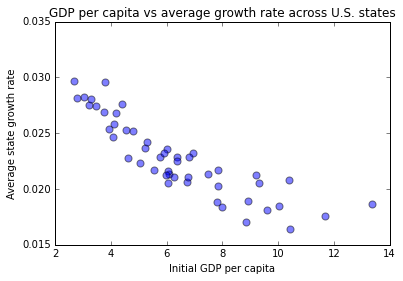

In [24]:
# Construct a scatter plot with:
#     1. GDP per capita in the initial year on the horizontal axis
#     2. Average growth rate of GDP per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. y-axis limit: [0.015,0.035]
#     6. Suitable title and labels for the axes


plt.scatter(x = state_df.iloc[0], y = state_growth_rates, s = 50, alpha = .5)
plt.ylim(0.015, 0.035)
plt.xlabel("Initial GDP per capita")
plt.ylabel("Average state growth rate")
plt.title("GDP per capita vs average growth rate across U.S. states")
plt.show()

### Part (b)

Like you did for the country data above, use OLS to estimate the relationship between income per capita in the initial year and average growth of income per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is state $i$'s initial income per capita, and $\epsilon_i$ is the residual of the regression.

In [27]:
# Create a variable called 'y' that is equal to the average growth rates of the states
y = state_growth_rates

# Create a variable called x' that is equal to the income per capita of the states in the initial year
x = state_df.iloc[0]

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x = sm.add_constant(x)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model = sm.OLS(y, x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results = model.fit()

# Print the summary of results generated by the summary() method of results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     150.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.81e-16
Time:                        19:41:14   Log-Likelihood:                 244.21
No. Observations:                  49   AIC:                            -484.4
Df Residuals:                      47   BIC:                            -480.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0305      0.001     45.368      0.000       0.029       0.032
1929          -0.0012    9.9e-05    -12.283      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.323
Skew:                           0.377   Prob(JB):                        0.516
Kurtosis:                       2.720   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the R-squared of the regression.
3. Why do you think that initial income and average growth are so strongly correlated in the state data but not so in the country data? (If you're not sure, referesh your knowledge about the difference between *conditional* and *unconditional* convergence: https://en.wikipedia.org/wiki/Convergence_(economics)#Types_of_Convergence)

**Answers**

1. A one percent increase in initial GDP decreases the average state growth rate by 0.12%

2. The R-Squared value, 0.762, means that the initial year GDP per capita explains over 75% of the variation in average state growth rates.

3. The correlation is stronger in U.S. state data since there is a wider gap in income inequality. 